In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data.load_mnist import load_mnist
from core.network.twolayernet import BackPropagationNet

In [2]:
(X_train, T_train), (X_test, T_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = X_train.shape[0]

## Activation Function variations

### Mish

In [3]:
mish_network = BackPropagationNet(784, 50, 10)

mish_iters_num = 10000
mish_batch_size = 100
mish_lr = 0.1

mish_train_loss_list = []
mish_train_acc_list = []
mish_test_acc_list = []

mish_iter_per_epoch = max(train_size / mish_batch_size, 1)

for i in range(mish_iters_num):
    batch_mask = np.random.choice(train_size, mish_batch_size)
    X_batch = X_train[batch_mask]
    T_batch = T_train[batch_mask]

    grad = mish_network.gradient(X_batch, T_batch)

    for key in ("W1", "B1", "W2", "B2"):
        mish_network.params[key] -= mish_lr * grad[key]

    loss = mish_network.loss(X_batch, T_batch)
    mish_train_loss_list.append(loss)

    if i % mish_iter_per_epoch == 0:
        mish_train_acc = mish_network.accuracy(X_train, T_train)
        mish_test_acc = mish_network.accuracy(X_test, T_test)
        mish_train_acc_list.append(mish_train_acc)
        mish_test_acc_list.append(mish_test_acc)

        print("train acc, test acc | " + str(mish_train_acc) + ", " + str(mish_test_acc))

train acc, test acc | 0.19363333333333332, 0.1955
train acc, test acc | 0.8881833333333333, 0.8953
train acc, test acc | 0.9138833333333334, 0.9162
train acc, test acc | 0.9276, 0.9254
train acc, test acc | 0.936, 0.9343
train acc, test acc | 0.9446, 0.9405
train acc, test acc | 0.95055, 0.9464
train acc, test acc | 0.9515833333333333, 0.9503
train acc, test acc | 0.9554666666666667, 0.95
train acc, test acc | 0.95935, 0.9521
train acc, test acc | 0.9606333333333333, 0.9549
train acc, test acc | 0.9631333333333333, 0.9578
train acc, test acc | 0.96505, 0.9591
train acc, test acc | 0.96685, 0.9601
train acc, test acc | 0.9699833333333333, 0.9623
train acc, test acc | 0.9703166666666667, 0.9616
train acc, test acc | 0.9709166666666667, 0.9614


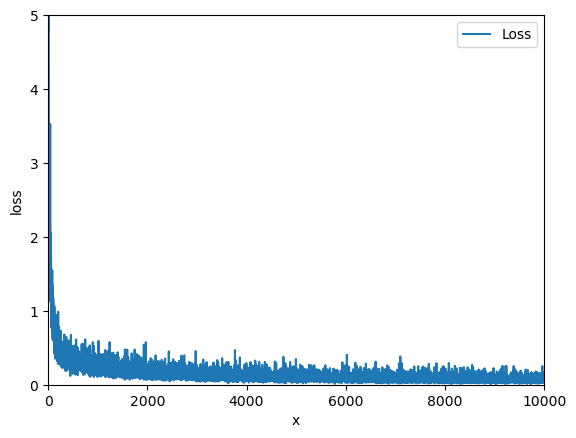

In [4]:
x = np.arange(len(mish_train_loss_list))
plt.plot(x, mish_train_loss_list, label="Loss")
plt.xlim(0, 10000)
plt.ylim(0, 5.0)
plt.xlabel("x")
plt.ylabel("loss")
plt.legend()
plt.show()

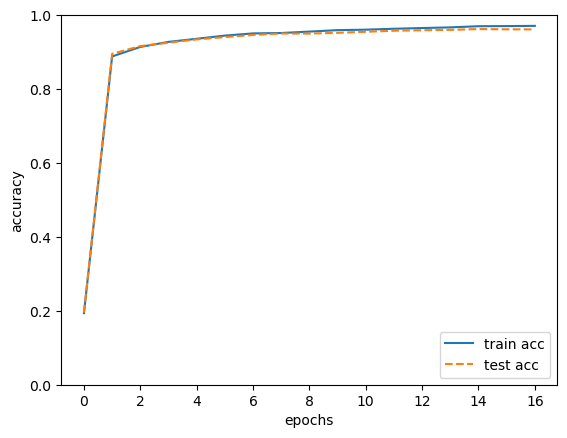

In [5]:
markers = {"train": "o", "test": "s"}

x = np.arange(len(mish_train_acc_list))

plt.plot(x, mish_train_acc_list, label="train acc")
plt.plot(x, mish_test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()

In [6]:
print(f"final loss: {mish_train_loss_list[-1]}")
print(f"final train accuracy: {mish_train_acc_list[-1]}")
print(f"final test accuracy: {mish_test_acc_list[-1]}")

final loss: 0.06515374901261829
final train accuracy: 0.9709166666666667
final test accuracy: 0.9614
